<a href="https://colab.research.google.com/github/Raiyan-DEA/Dataframe_content/blob/main/predict_Customer_Churn_with_Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [3]:
# 2. Load Data
# url = "https://raw.githubusercontent.com/blastchar/telco-customer-churn/master/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


(7043, 21)
Churn
No     5174
Yes    1869
Name: count, dtype: int64


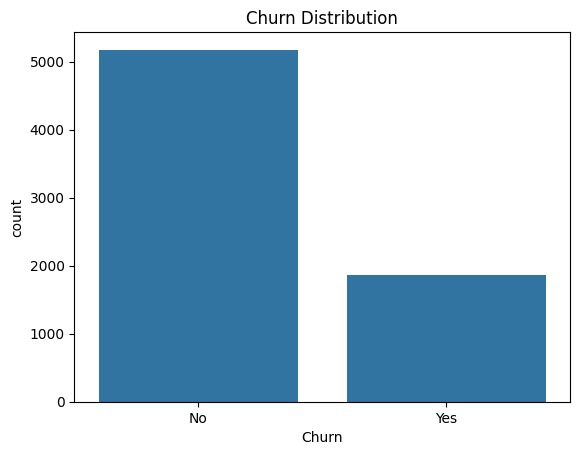

In [4]:
# 3. Quick EDA of the data
print(df.shape)
print(df['Churn'].value_counts())
sns.countplot(data=df, x='Churn')
plt.title("Churn Distribution")
plt.show()

In [5]:
# 4. Drop unnecessary columns
df = df.drop(['customerID'], axis=1)

# 5. Convert TotalCharges to numeric (it has missing/blank values)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna()  # Drop rows with missing TotalCharges

print(df.head())

   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No  

In [8]:
# 6. Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

print(df_encoded.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   tenure                                 7032 non-null   int64  
 2   MonthlyCharges                         7032 non-null   float64
 3   TotalCharges                           7032 non-null   float64
 4   gender_Male                            7032 non-null   bool   
 5   Partner_Yes                            7032 non-null   bool   
 6   Dependents_Yes                         7032 non-null   bool   
 7   PhoneService_Yes                       7032 non-null   bool   
 8   MultipleLines_No phone service         7032 non-null   bool   
 9   MultipleLines_Yes                      7032 non-null   bool   
 10  InternetService_Fiber optic            7032 non-null   bool   
 11  InternetS

In [10]:
# 7. Define X and y
X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes']

# 8. Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# 9. Train logistic regression
model = LogisticRegression(max_iter=600)
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=600)

In [14]:
# 10. Predict & Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.7882018479033405
Confusion Matrix:
 [[917 116]
 [182 192]]
Classification Report:
               precision    recall  f1-score   support

       False       0.83      0.89      0.86      1033
        True       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



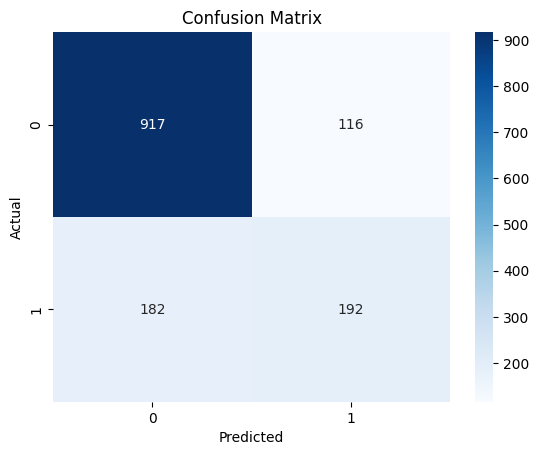

In [15]:
# 11. Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [16]:
# 12. Feature importance (coefficients)
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})
coeff_df = coeff_df.sort_values(by='Coefficient', ascending=False)
print(coeff_df.head(10))



                           Feature  Coefficient
10     InternetService_Fiber optic     0.673340
26            PaperlessBilling_Yes     0.280527
8   MultipleLines_No phone service     0.270339
28  PaymentMethod_Electronic check     0.263728
0                    SeniorCitizen     0.260463
9                MultipleLines_Yes     0.200200
23             StreamingMovies_Yes     0.192146
21                 StreamingTV_Yes     0.176035
5                      Partner_Yes     0.048319
2                   MonthlyCharges     0.004838


In [ ]:
# Optional: Plot top features
plt.figure(figsize=(8, 6))
sns.barplot(data=coeff_df.head(10), x='Coefficient', y='Feature')
plt.title("Top Positive Features Influencing Churn")
plt.tight_layout()
plt.show()